EDA_Quimica_Python_Clase3.ipynb

**EIY403 - Introducción al Análisis de Datos para Otras Carreras**
**Clase 3: Análisis Exploratorio con Python**
**Dataset: Experimentos de Química Industrial**

Autor: Prof. Jordy Alfaro Brenes
Universidad Nacional de Costa Rica

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("EDA CON PYTHON - DATOS QUÍMICOS")
print("=" * 50)
print("Universidad Nacional de Costa Rica")
print("EIY403 - Clase 3")
print("=" * 50)

EDA CON PYTHON - DATOS QUÍMICOS
Universidad Nacional de Costa Rica
EIY403 - Clase 3


PASO 1: CARGA Y EXPLORACIÓN INICIAL

In [2]:
print("\n🔍 PASO 1: CARGA Y EXPLORACIÓN INICIAL")
print("-" * 40)

# Subir el dataset a Google Colab
from google.colab import files
print("Por favor, sube el archivo 'dataset_quimica_eda.txt':")
uploaded = files.upload()

# Cargar el dataset
df = pd.read_csv('dataset_quimica_eda.txt')

print(f"Dataset cargado exitosamente!")
print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"Período: {df['fecha_experimento'].min()} a {df['fecha_experimento'].max()}")

# Primeras filas
print("\n PRIMERAS 5 FILAS:")
print(df.head())

# Información general
print("\n INFORMACIÓN DEL DATASET:")
print(df.info())


🔍 PASO 1: CARGA Y EXPLORACIÓN INICIAL
----------------------------------------
Por favor, sube el archivo 'dataset_quimica_eda.txt':


Saving dataset_quimica_eda.txt to dataset_quimica_eda (6).txt
Dataset cargado exitosamente!
Dimensiones: 100 filas × 16 columnas
Período: 2025-03-10 a 2025-04-11

 PRIMERAS 5 FILAS:
  experimento_id estudiante_id laboratorio tipo_solucion fecha_experimento  \
0           E001       EST_001       Lab_A    acido_base        2025-03-10   
1           E002       EST_002       Lab_A    acido_base        2025-03-10   
2           E003       EST_003       Lab_B        salina        2025-03-10   
3           E004       EST_004       Lab_C     azucarada        2025-03-10   
4           E005       EST_005       Lab_A    acido_base        2025-03-11   

    ph  temperatura_C  concentracion_sal_mg_L  concentracion_azucar_g_L  \
0  3.2           22.5                   150.0                         0   
1  3.1           22.8                   145.0                         0   
2  7.0           21.2                   850.0                         0   
3  6.8           23.1                    50.0    

PASO 2: CALIDAD DE DATOS

In [3]:
print("\n\n PASO 2: EVALUACIÓN DE CALIDAD DE DATOS")
print("-" * 45)

# Valores faltantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

print(" VALORES FALTANTES:")
missing_df = pd.DataFrame({
    'Variable': missing.index,
    'Faltantes': missing.values,
    'Porcentaje': missing_pct.values
}).round(2)

print(missing_df[missing_df['Faltantes'] > 0])

if missing.sum() == 0:
    print(" ¡Excelente! No hay valores faltantes.")
else:
    print(f"  Total de valores faltantes: {missing.sum()}")

# Duplicados
duplicados = df.duplicated().sum()
print(f"\n DUPLICADOS COMPLETOS: {duplicados}")

# Verificar duplicados por ID
duplicados_id = df['experimento_id'].duplicated().sum()
print(f" IDs duplicados: {duplicados_id}")



 PASO 2: EVALUACIÓN DE CALIDAD DE DATOS
---------------------------------------------
 VALORES FALTANTES:
                  Variable  Faltantes  Porcentaje
5                       ph          2         2.0
7   concentracion_sal_mg_L          1         1.0
11           densidad_g_mL          1         1.0
15     precipitado_formado          1         1.0
  Total de valores faltantes: 5

 DUPLICADOS COMPLETOS: 0
 IDs duplicados: 0


LIMPIEZA BÁSICA (si es necesaria)

In [4]:
print("\n\n🧹 PASO 3: LIMPIEZA DE DATOS")
print("-" * 35)

# Crear copia para trabajar
df_clean = df.copy()

# Tratamiento de valores faltantes (si los hay)
if df.isnull().sum().sum() > 0:
    print(" Aplicando limpieza...")

    # Imputación simple por tipo de solución para pH
    if df['ph'].isnull().any():
        df_clean['ph'] = df_clean.groupby('tipo_solucion')['ph'].transform(
            lambda x: x.fillna(x.mean())
        )

    # Imputación con mediana para variables numéricas
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().any():
            df_clean[col].fillna(df_clean[col].median(), inplace=True)

    print(f" Limpieza completada. Faltantes restantes: {df_clean.isnull().sum().sum()}")
else:
    print(" No se requiere limpieza. Datos completos.")



🧹 PASO 3: LIMPIEZA DE DATOS
-----------------------------------
 Aplicando limpieza...
 Limpieza completada. Faltantes restantes: 1


PASO 4: ANÁLISIS UNIVARIADO

In [5]:
print("\n\n PASO 4: ANÁLISIS UNIVARIADO")
print("-" * 35)

# === VARIABLES CATEGÓRICAS ===
print("\n VARIABLES CATEGÓRICAS:")

# Distribución por laboratorio
print("\n DISTRIBUCIÓN POR LABORATORIO:")
lab_counts = df_clean['laboratorio'].value_counts()
lab_pct = (lab_counts / len(df_clean) * 100).round(1)
for lab, count in lab_counts.items():
    print(f"   {lab}: {count} ({lab_pct[lab]}%)")

# Distribución por tipo de solución
print("\n DISTRIBUCIÓN POR TIPO DE SOLUCIÓN:")
tipo_counts = df_clean['tipo_solucion'].value_counts()
for tipo, count in tipo_counts.items():
    pct = (count / len(df_clean) * 100)
    print(f"   {tipo}: {count} ({pct:.1f}%)")

# === VARIABLES NUMÉRICAS ===
print("\n\n VARIABLES NUMÉRICAS - ESTADÍSTICAS PRINCIPALES:")

# Seleccionar variables numéricas clave
numeric_vars = ['ph', 'temperatura_C', 'concentracion_sal_mg_L',
                'concentracion_azucar_g_L', 'densidad_g_mL']

# Estadísticas descriptivas
stats_desc = df_clean[numeric_vars].describe().round(3)
print(stats_desc)

# Coeficientes de variación
print("\n COEFICIENTES DE VARIACIÓN (%):")
for var in numeric_vars:
    if var in df_clean.columns:
        mean_val = df_clean[var].mean()
        std_val = df_clean[var].std()
        cv = (std_val / mean_val) * 100
        print(f"   {var}: {cv:.1f}%")

        # Interpretación automática
        if cv < 15:
            print(f"      → Variabilidad BAJA - Control excelente")
        elif cv < 30:
            print(f"      → Variabilidad MODERADA - Control bueno")
        else:
            print(f"      → Variabilidad ALTA - Revisar procedimientos")



 PASO 4: ANÁLISIS UNIVARIADO
-----------------------------------

 VARIABLES CATEGÓRICAS:

 DISTRIBUCIÓN POR LABORATORIO:
   Lab_A: 34 (34.0%)
   Lab_B: 33 (33.0%)
   Lab_C: 33 (33.0%)

 DISTRIBUCIÓN POR TIPO DE SOLUCIÓN:
   cristalizacion: 17 (17.0%)
   azucarada: 16 (16.0%)
   acido_base: 14 (14.0%)
   dilucion: 14 (14.0%)
   concentracion: 12 (12.0%)
   precipitacion: 11 (11.0%)
   neutralizacion: 8 (8.0%)
   salina: 6 (6.0%)
   indicadores: 2 (2.0%)


 VARIABLES NUMÉRICAS - ESTADÍSTICAS PRINCIPALES:
            ph  temperatura_C  concentracion_sal_mg_L  \
count  100.000        100.000                 100.000   
mean     5.993         24.059                 755.040   
std      1.897          1.617                 739.259   
min      1.200         21.200                  45.000   
25%      4.275         22.875                 150.000   
50%      6.550         23.600                 325.000   
75%      7.000         25.025                1187.500   
max     11.800         27.600    

PASO 5: VISUALIZACIONES CLAVE



 PASO 5: VISUALIZACIONES
------------------------------


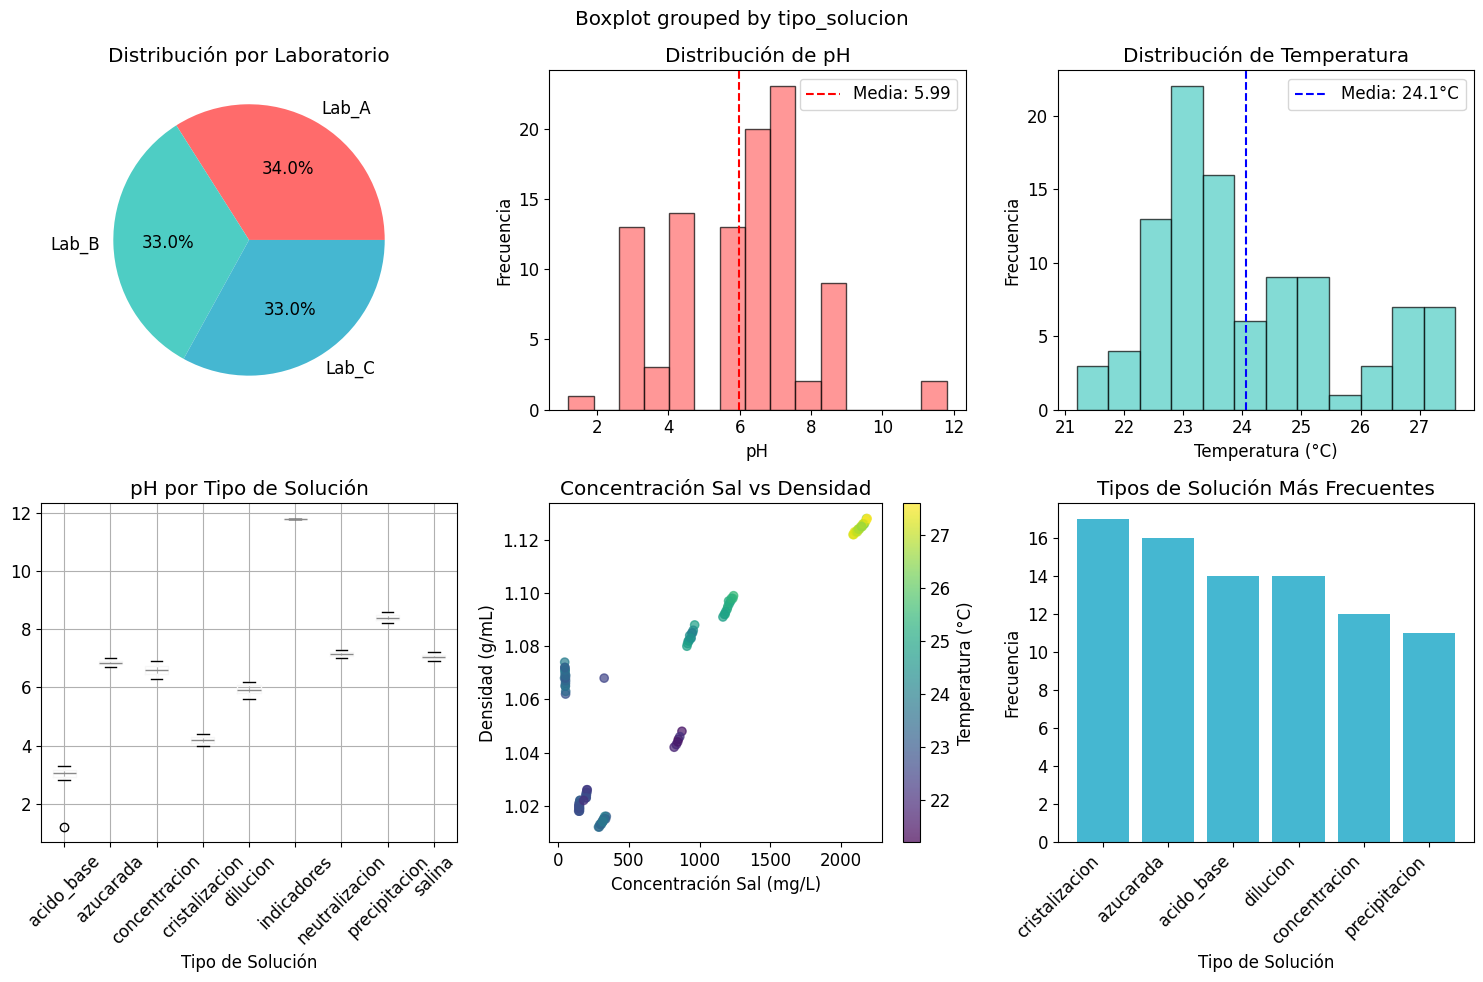

In [6]:
print("\n\n PASO 5: VISUALIZACIONES")
print("-" * 30)

# Configurar subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Análisis Exploratorio - Datos Químicos', fontsize=16, fontweight='bold')

# 1. Distribución por laboratorio
axes[0,0].pie(lab_counts.values, labels=lab_counts.index, autopct='%1.1f%%',
              colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,0].set_title('Distribución por Laboratorio')

# 2. Histograma de pH
axes[0,1].hist(df_clean['ph'], bins=15, alpha=0.7, color='#FF6B6B', edgecolor='black')
axes[0,1].axvline(df_clean['ph'].mean(), color='red', linestyle='--',
                  label=f'Media: {df_clean["ph"].mean():.2f}')
axes[0,1].set_title('Distribución de pH')
axes[0,1].set_xlabel('pH')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].legend()

# 3. Histograma de temperatura
axes[0,2].hist(df_clean['temperatura_C'], bins=12, alpha=0.7, color='#4ECDC4', edgecolor='black')
axes[0,2].axvline(df_clean['temperatura_C'].mean(), color='blue', linestyle='--',
                  label=f'Media: {df_clean["temperatura_C"].mean():.1f}°C')
axes[0,2].set_title('Distribución de Temperatura')
axes[0,2].set_xlabel('Temperatura (°C)')
axes[0,2].set_ylabel('Frecuencia')
axes[0,2].legend()

# 4. Boxplot pH por tipo de solución
df_clean.boxplot(column='ph', by='tipo_solucion', ax=axes[1,0])
axes[1,0].set_title('pH por Tipo de Solución')
axes[1,0].set_xlabel('Tipo de Solución')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Scatter plot: Concentración vs Densidad
scatter = axes[1,1].scatter(df_clean['concentracion_sal_mg_L'], df_clean['densidad_g_mL'],
                           c=df_clean['temperatura_C'], cmap='viridis', alpha=0.7)
axes[1,1].set_title('Concentración Sal vs Densidad')
axes[1,1].set_xlabel('Concentración Sal (mg/L)')
axes[1,1].set_ylabel('Densidad (g/mL)')
plt.colorbar(scatter, ax=axes[1,1], label='Temperatura (°C)')

# 6. Barras de tipos más frecuentes
tipo_counts_top = tipo_counts.head(6)
axes[1,2].bar(range(len(tipo_counts_top)), tipo_counts_top.values, color='#45B7D1')
axes[1,2].set_title('Tipos de Solución Más Frecuentes')
axes[1,2].set_xlabel('Tipo de Solución')
axes[1,2].set_ylabel('Frecuencia')
axes[1,2].set_xticks(range(len(tipo_counts_top)))
axes[1,2].set_xticklabels(tipo_counts_top.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

PASO 6: ANÁLISIS BIVARIADO - CORRELACIONES



 PASO 6: ANÁLISIS BIVARIADO
-----------------------------------
 MATRIZ DE CORRELACIÓN:


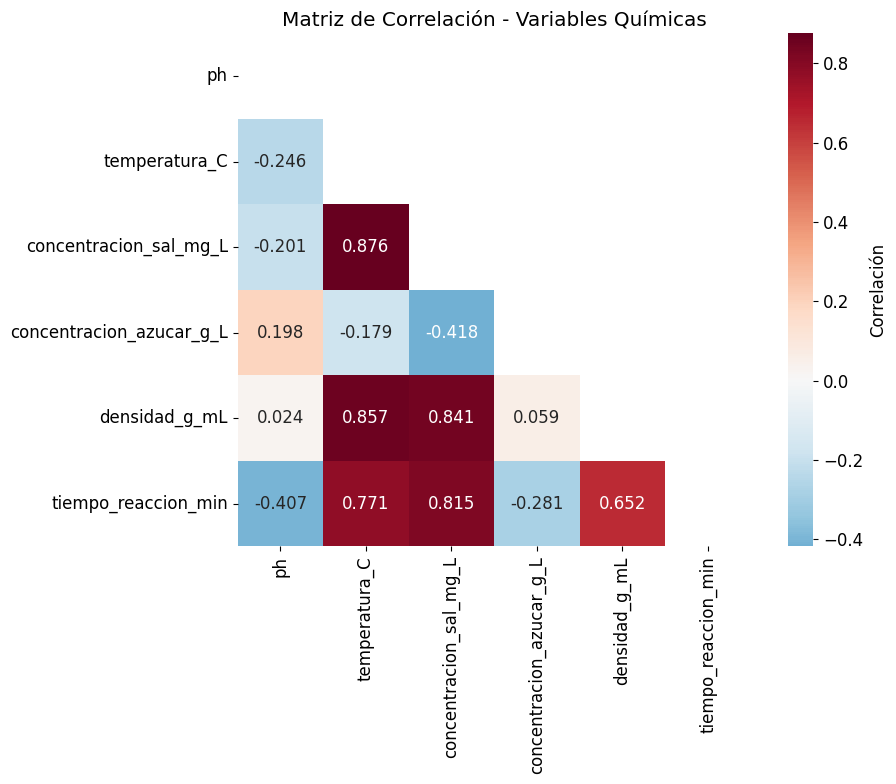


 CORRELACIONES MÁS FUERTES (|r| > 0.7):
   temperatura_C vs concentracion_sal_mg_L: r = 0.876
   temperatura_C vs densidad_g_mL: r = 0.857
   temperatura_C vs tiempo_reaccion_min: r = 0.771
   concentracion_sal_mg_L vs densidad_g_mL: r = 0.841
   concentracion_sal_mg_L vs tiempo_reaccion_min: r = 0.815


In [7]:
print("\n\n PASO 6: ANÁLISIS BIVARIADO")
print("-" * 35)

# Matriz de correlación
print(" MATRIZ DE CORRELACIÓN:")
corr_vars = ['ph', 'temperatura_C', 'concentracion_sal_mg_L',
             'concentracion_azucar_g_L', 'densidad_g_mL', 'tiempo_reaccion_min']

# Filtrar solo variables que existen
existing_vars = [var for var in corr_vars if var in df_clean.columns]
corr_matrix = df_clean[existing_vars].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación - Variables Químicas')
plt.tight_layout()
plt.show()

# Correlaciones más fuertes
print("\n CORRELACIONES MÁS FUERTES (|r| > 0.7):")
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            strong_corr.append(f"   {var1} vs {var2}: r = {corr_val:.3f}")

if strong_corr:
    for corr in strong_corr:
        print(corr)
else:
    print("   No se encontraron correlaciones muy fuertes (>0.7)")

PASO 7: ESTRUCTURAS DE CONTROL EN PYTHON

In [8]:
print("\n\n PASO 7: ESTRUCTURAS DE CONTROL")
print("-" * 40)

# === IF/ELSE para clasificación ===
print(" APLICANDO IF/ELSE - Clasificación de pH:")

def clasificar_ph(ph_valor):
    """Clasifica el pH en categorías"""
    if pd.isna(ph_valor):
        return "Sin datos"
    elif ph_valor < 3:
        return "Muy ácido"
    elif ph_valor < 6:
        return "Ácido"
    elif ph_valor < 8:
        return "Neutro"
    elif ph_valor < 11:
        return "Básico"
    else:
        return "Muy básico"

# Aplicar clasificación
df_clean['clasificacion_ph'] = df_clean['ph'].apply(clasificar_ph)

# Mostrar resultados
clasificacion_counts = df_clean['clasificacion_ph'].value_counts()
print("\n DISTRIBUCIÓN DE CLASIFICACIÓN DE pH:")
for categoria, count in clasificacion_counts.items():
    pct = (count / len(df_clean)) * 100
    print(f"   {categoria}: {count} ({pct:.1f}%)")

# === BUCLE FOR para análisis por grupos ===
print("\n\n APLICANDO BUCLE FOR - Análisis por laboratorio:")

laboratorios = df_clean['laboratorio'].unique()
resultados_lab = []

for lab in laboratorios:
    print(f"\n Analizando {lab}:")
    datos_lab = df_clean[df_clean['laboratorio'] == lab]

    n_muestras = len(datos_lab)
    ph_promedio = datos_lab['ph'].mean()
    temp_promedio = datos_lab['temperatura_C'].mean()

    # Calcular proporción de precipitados
    precipitados = (datos_lab['precipitado_formado'] == 'si').sum()
    prop_precipitados = (precipitados / n_muestras) * 100

    print(f"    Muestras: {n_muestras}")
    print(f"    pH promedio: {ph_promedio:.2f}")
    print(f"     Temperatura promedio: {temp_promedio:.1f}°C")
    print(f"    Precipitados: {precipitados} ({prop_precipitados:.1f}%)")

    # Guardar resultados
    resultados_lab.append({
        'Laboratorio': lab,
        'Muestras': n_muestras,
        'pH_Promedio': round(ph_promedio, 2),
        'Temp_Promedio': round(temp_promedio, 1),
        'Precipitados_Pct': round(prop_precipitados, 1)
    })

# Crear DataFrame resumen
resumen_lab = pd.DataFrame(resultados_lab)
print(f"\n RESUMEN POR LABORATORIO:")
print(resumen_lab)

# === WHILE para control de calidad ===
print("\n\n APLICANDO WHILE - Control de calidad iterativo:")

def control_calidad_ph(datos, limite_inferior=1.0, limite_superior=12.0):
    """Control de calidad iterativo para pH"""
    iteration = 0
    max_iterations = 3
    datos_control = datos.copy()

    print(f" Límites de control: [{limite_inferior}, {limite_superior}]")

    while iteration < max_iterations:
        iteration += 1

        # Identificar valores fuera de rango
        fuera_rango = (datos_control['ph'] < limite_inferior) | (datos_control['ph'] > limite_superior)
        n_fuera_rango = fuera_rango.sum()

        print(f"\n Iteración {iteration}:")
        print(f"    Muestras fuera de rango: {n_fuera_rango}")

        if n_fuera_rango == 0:
            print("    Todos los valores dentro del rango aceptable")
            break
        else:
            print(f"     {n_fuera_rango} valores requieren atención")
            # En un caso real, aquí se tomarían acciones correctivas

    total_muestras = len(datos_control)
    conformes = total_muestras - n_fuera_rango
    porcentaje_conforme = (conformes / total_muestras) * 100

    print(f"\n RESULTADO FINAL:")
    print(f"    Muestras conformes: {conformes}/{total_muestras} ({porcentaje_conforme:.1f}%)")

    return porcentaje_conforme

# Ejecutar control de calidad
calidad_ph = control_calidad_ph(df_clean)



 PASO 7: ESTRUCTURAS DE CONTROL
----------------------------------------
 APLICANDO IF/ELSE - Clasificación de pH:

 DISTRIBUCIÓN DE CLASIFICACIÓN DE pH:
   Neutro: 48 (48.0%)
   Ácido: 35 (35.0%)
   Básico: 11 (11.0%)
   Muy ácido: 4 (4.0%)
   Muy básico: 2 (2.0%)


 APLICANDO BUCLE FOR - Análisis por laboratorio:

 Analizando Lab_A:
    Muestras: 34
    pH promedio: 4.86
     Temperatura promedio: 23.5°C
    Precipitados: 6 (17.6%)

 Analizando Lab_B:
    Muestras: 33
    pH promedio: 6.76
     Temperatura promedio: 24.3°C
    Precipitados: 17 (51.5%)

 Analizando Lab_C:
    Muestras: 33
    pH promedio: 6.39
     Temperatura promedio: 24.4°C
    Precipitados: 5 (15.2%)

 RESUMEN POR LABORATORIO:
  Laboratorio  Muestras  pH_Promedio  Temp_Promedio  Precipitados_Pct
0       Lab_A        34         4.86           23.5              17.6
1       Lab_B        33         6.76           24.3              51.5
2       Lab_C        33         6.39           24.4              15.2


 APLICAN

PASO 8: RESUMEN Y CONCLUSIONES

In [9]:
print("\n\n PASO 8: RESUMEN Y CONCLUSIONES")
print("-" * 40)

print("🎯 HALLAZGOS PRINCIPALES:")
print(f"    Dataset: {df.shape[0]} experimentos × {df.shape[1]} variables")
print(f"    Laboratorios: {df_clean['laboratorio'].nunique()} (distribución equilibrada)")
print(f"    Tipos de solución: {df_clean['tipo_solucion'].nunique()}")
print(f"    Calidad de datos: {calidad_ph:.1f}% de muestras conformes")

print(f"\n CARACTERÍSTICAS QUÍMICAS:")
print(f"    Rango de pH: {df_clean['ph'].min():.1f} - {df_clean['ph'].max():.1f}")
print(f"     Rango de temperatura: {df_clean['temperatura_C'].min():.1f}°C - {df_clean['temperatura_C'].max():.1f}°C")
print(f"    Control de temperatura: CV = {(df_clean['temperatura_C'].std()/df_clean['temperatura_C'].mean()*100):.1f}% (Excelente)")

# Tipo más frecuente
tipo_mas_frecuente = df_clean['tipo_solucion'].mode()[0]
print(f"    Tipo más frecuente: {tipo_mas_frecuente}")

print(f"\n RECOMENDACIONES:")
print(f"   1. Mantener excelente control de temperatura actual")
print(f"   2. Estandarizar protocolos por tipo de solución")
print(f"   3. Monitorear correlaciones identificadas")
print(f"   4. Implementar controles automáticos de calidad")

print("\n" + "="*60)
print(" ANÁLISIS EDA COMPLETADO CON PYTHON")
print(" Estructuras de control aplicadas exitosamente")
print(" Dataset de química industrial analizado completamente")
print(" Universidad Nacional de Costa Rica - EIY403")
print("="*60)



 PASO 8: RESUMEN Y CONCLUSIONES
----------------------------------------
🎯 HALLAZGOS PRINCIPALES:
    Dataset: 100 experimentos × 16 variables
    Laboratorios: 3 (distribución equilibrada)
    Tipos de solución: 9
    Calidad de datos: 100.0% de muestras conformes

 CARACTERÍSTICAS QUÍMICAS:
    Rango de pH: 1.2 - 11.8
     Rango de temperatura: 21.2°C - 27.6°C
    Control de temperatura: CV = 6.7% (Excelente)
    Tipo más frecuente: cristalizacion

 RECOMENDACIONES:
   1. Mantener excelente control de temperatura actual
   2. Estandarizar protocolos por tipo de solución
   3. Monitorear correlaciones identificadas
   4. Implementar controles automáticos de calidad

 ANÁLISIS EDA COMPLETADO CON PYTHON
 Estructuras de control aplicadas exitosamente
 Dataset de química industrial analizado completamente
 Universidad Nacional de Costa Rica - EIY403
